# Да ли сте гојазни?
У претходној лекцији смо описали неколико демографских варијабли из __[**NHANES**](https://www.cdc.gov/Nchs/Nhanes/about_nhanes.htm)__ скупа података. Сада ћемо се позабавити варијаблама које се тичу здравственог стања испитаника. За почетак ћемо анализирати варијаблу **BMXBMI** која садржи вредности *индекса телесне масе* испитаника (енгл. *BMI - Body Mass Index*). BMI се рачуна као однос телесне масе (тежине) особе и квадрата њене висине. 

Пошто нам је циљ да анализирамо вредности BMI (BMXBMI) у контексту старости (RIDAGEYR) и пола (RIAGENDR), потребни су нам подаци из две табеле: *demographic.csv* и *examination.csv*. Свака од табела садржи колону под називом SEQN (енгл. *respondent sequence number*) која представља јединствену идентификацију испитаника. На основу те вредности можемо да спојимо редове из различитих табела користећи функцију `merge` модула `pandas`. Да бисмо уштедели меморијски простор, увешћемо само одабране колоне из сваке табеле, а основне скупове ћемо обрисати након формирања новог. Обратите пажњу на број записа (редова) у сваком скупу података. Скуп који смо добили има онолико редова колико има мањи од два скупа података јер резултати лекарског прегледа нису доступни за све испитанике за које су прикупљени демографски подаци. 

In [2]:
import pandas as pd

# Увозимо само три варијабле из матрице demographic.csv
podaciDem = pd.read_csv('podaci/demographic.csv')[['SEQN', 'RIAGENDR', 'RIDAGEYR']]
# и приказујемо број записа (редова)
print("podaciDem: ", len(podaciDem))

podaciMed = pd.read_csv('podaci/examination.csv')[['SEQN', 'BMXBMI']]
print("podaciMed: ", len(podaciMed))

# Повезујемо (merge) претходне две табеле по варијабли SEQN
podaciDemMed = pd.merge(podaciDem, podaciMed, on='SEQN') 
print("podaciDemMed: ", len(podaciDemMed))

# Бришемо привремене оквире који нам више нису потребни
del podaciDem, podaciMed

podaciDem:  10175
podaciMed:  9813
podaciDemMed:  9813


Најпре ћемо приказати дистрибуцију вредности BMI, овога пута користећи *полигон фреквенција*. Овај дијаграм је веома сличан хистограму јер приказује расподелу учесталости по различитим вредностима варијабле, али се уместо стубића користи линија. Полигон ћемо исцртати користећи библиотеку `seaborn`.

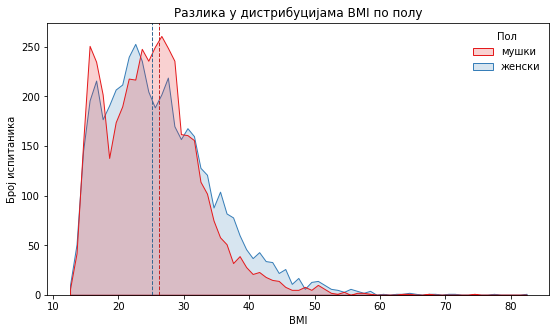

In [12]:
import seaborn as sbrn
import matplotlib.pyplot as plt

# Дефинишемо величину графикона
plt.figure(figsize = (9,5))

# Исцртавамо полигон фреквенција (element='poly') за BMXBMI одвојено за полове (hue='RIAGENDR')
ax = sbrn.histplot(podaciDemMed, x='BMXBMI', hue='RIAGENDR', alpha=0.2, element='poly', palette='Set1')

# Подешавамо наслов графикона и називе оса
ax.set_title('Разлика у дистрибуцијама BMI по полу')
ax.set_xlabel('BMI')
ax.set_ylabel('Број испитаника')

# Учитавамо објекат legend графикона у варијаблу leg
leg = ax.get_legend()
# Да бисмо променили неколико параметара легенде
leg.set_frame_on(False)
leg.set_title('Пол')
leg.texts[0].set_text('мушки')
leg.texts[1].set_text('женски')

# Исцртавамо линије којима су представљене аритметичке средине BMI по полу
ax.axvline(podaciDemMed[podaciDemMed['RIAGENDR']==1]['BMXBMI'].mean(), linestyle='--', color='#346994', lw=1)
ax.axvline(podaciDemMed[podaciDemMed['RIAGENDR']==2]['BMXBMI'].mean(), linestyle='--', color='#c52425', lw=1)

На основу горње слике уочавамо да је BMI код жена у просеку незнатно виши. Међутим, за наставак анализе важније је да уочите да су дистрибуције BMI за оба пола *искошене удесно*, што значи да им је десни „реп“ развучен. Оне су такође *бимодалне*. На то нам указују два очигледна „брдашца“ која су настала јер се вредности гомилају око два мода, највероватније због тога што узорак чине две различите групе особа. Истраживач би требало да испита могуће узроке ове појаве тако што ће анализирати дистрибуције за различите категорије испитаника које се могу формирати на основу доступних демографских варијабли, нпр. пола, образовања, места становања и сл. У нашем примеру ћемо исту слику приказати за испитанике различитог узраста. Направићемо мрежу (fig) два графикона (ax1, ax2).

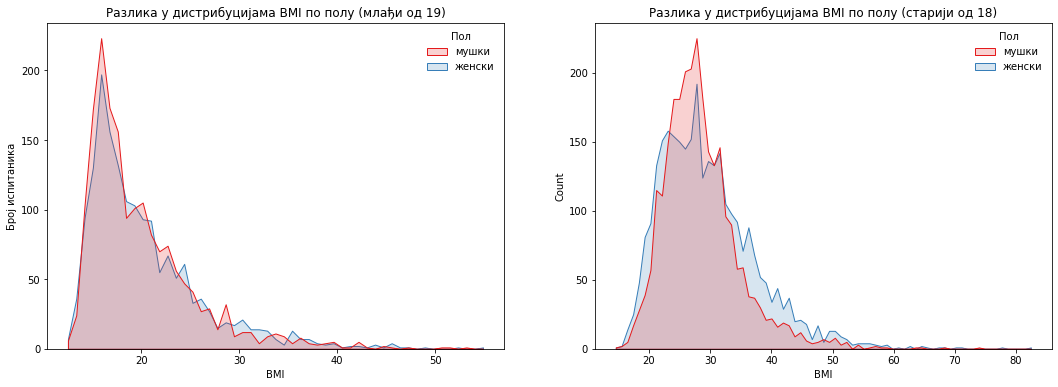

In [4]:
# Дефинишемо објекат figure са два места за графиконе у реду
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

# Поновљен полигон из горњег кода, али за испитанике млађе од 19 година
sbrn.histplot(podaciDemMed[podaciDemMed['RIDAGEYR']<19], x='BMXBMI', hue='RIAGENDR', alpha=0.2, element='poly', ax=ax1, palette='Set1')
ax1.set_title('Разлика у дистрибуцијама BMI по полу (млађи од 19)')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Број испитаника')
leg = ax1.get_legend()
# Уклањамо оквир око легенде
leg.set_frame_on(False)
# Подешавамо наслов легенде
leg.set_title('Пол')
# Подешавање назива првог (0) и другог (1) по реду елемента легенде
leg.texts[0].set_text('мушки')
leg.texts[1].set_text('женски')

# Можете да мењате боју графикона користећи неке од палета (palette) билбиотеке matplotlib
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
sbrn.histplot(podaciDemMed[podaciDemMed['RIDAGEYR']>18], x='BMXBMI', hue='RIAGENDR', alpha=0.2, element='poly', ax=ax2, palette='Set1')
ax2.set_title('Разлика у дистрибуцијама BMI по полу (старији од 18)')
ax2.set_xlabel('BMI')
leg = ax2.get_legend()
leg.set_frame_on(False)
leg.set_title('Пол')
leg.texts[0].set_text('мушки')
leg.texts[1].set_text('женски')

Увек треба проверити да ли је оправдано објединити вредности варијабли за различите категорије испитаника, било да је у питању другачија методологија рачунања као у овом случају, или једноставно чињеница да одређена група испитаника има у просеку мање или веће вредности варијабле од друге. То нам се и десило у овој анализи јер млађи испитаници (слика лево) имају у просеку ниже вредности BMI од старијих (слика десно). Приказане дистрибуције BMI формиране на основу узрасне категорије су сада много уједначеније (хомогеније), па су самим тим и описни показатељи поузданији.

У наредном кораку упоредите вредности типичних описних показатеља за укупан узорак и за подузорке подељене по узрасту и полу (1 - мушки, 2 - женски). Обратите пажњу да је хетерогеност испитаника, односно варијабилност резултата изражена *стандардном девијацијом* (std) мања на подузорцима него на целокупном узорку. Другим речима, испитаници су међусобно сличнији у подгрупама него када се посматра обједињен узорак.

In [5]:
# Функција describe() израчунава основне описне показатеље
# Прво их рачунамо за варијаблу BMXBMI на целом узорку уз груписање по полу (RIAGENDR) помоћу функције groupby()  
print("СВИ ИСПИТАНИЦИ\n", podaciDemMed.groupby('RIAGENDR')['BMXBMI'].describe())

# затим за млађе од 19
print("\nMLAĐI OD 19:\n", podaciDemMed[podaciDemMed['RIDAGEYR']<19].groupby('RIAGENDR')['BMXBMI'].describe())

# и на крају за старије од 18 година
print("\nSTARIJI OD 18:\n", podaciDemMed[podaciDemMed['RIDAGEYR']>18].groupby('RIAGENDR')['BMXBMI'].describe())

СВИ ИСПИТАНИЦИ
            count       mean       std   min   25%    50%   75%   max
RIAGENDR                                                            
1         4436.0  25.085528  7.289651  12.3  19.6  24.65  29.1  74.1
2         4619.0  26.247478  8.507615  12.1  19.9  24.90  31.2  82.9

MLAĐI OD 19:
            count       mean       std   min   25%   50%   75%   max
RIAGENDR                                                           
1         1738.0  19.853222  5.484524  12.3  16.0  18.2  22.1  53.3
2         1656.0  20.282065  5.879594  12.1  16.1  18.6  22.8  55.3

STARIJI OD 18:
            count       mean       std   min   25%   50%   75%   max
RIAGENDR                                                           
1         2698.0  28.456079  6.245215  14.1  24.3  27.5  31.3  74.1
2         2963.0  29.581505  7.906640  14.2  23.7  28.2  33.7  82.9


<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Могло би се очекивати да је аритметичка средина на укупном узорку једнака просеку аритметичких средина подузорака, односно млађих и старијих испитника. Због чега то није није тако, већ је ова вредност нешто ближа вредности просека BMI за старије испитанике?</div> 

За потребе наредне анализе формираћемо категорије испитаника с обзиром на вредност BMI и сместити их у колону `BMIKat`. Постоји више различитих критеријума за категоризацију, али ми ћемо користити ону која је употребљена и у истраживању чије податке користимо. Уочите да смо приликом позивања функције `between` употребили параметар `inclusive='left'`, чиме је у распон укључена само његова доња, али не и горња граница. Ово је јако битно да се исти испитаници не би нашли у различитим категоријама. За лакшу манипулацију низовима података употребићемо библиотеку `numpy`. 

In [6]:
import numpy as np

# Дефинишемо распоне вредности BMI на основу којих ћемо формирати пет категорија
granice = [ podaciDemMed['BMXBMI'] < 18.5, 
            (podaciDemMed['BMXBMI'].between(18.5, 25, inclusive='left')), 
            (podaciDemMed['BMXBMI'].between(25, 30, inclusive='left')),
            (podaciDemMed['BMXBMI'].between(30, 35, inclusive='left')),
            podaciDemMed['BMXBMI'] >= 35
          ]
# Категорије ћемо означити бројевима
kategorije = [1, 2, 3, 4, 5]
# и дати им називе
kategorijeNazivi = ['испод', 'нормално', 'изнад', 'гојазни', 'веома гојазни']

# Функција select() пакета numpy додељује вредност категорије (1-5)
# новој варијабли (BMIkat) на основу граница у низу granice
podaciDemMed['BMIKat'] = np.select(granice, kategorije, default=np.nan)

# Правимо подскуп за мушкарце
muskarci = podaciDemMed[(podaciDemMed['RIAGENDR']==1) & (podaciDemMed['RIDAGEYR']>18)]['BMIKat'].value_counts().sort_index()
# и подскуп за жене
zene = podaciDemMed[(podaciDemMed['RIAGENDR']==2) & (podaciDemMed['RIDAGEYR']>18)]['BMIKat'].value_counts().sort_index()
# а потом два подскупа спајамо по вертикали функцијом concat()
svi = pd.concat([muskarci.rename('М'), zene.rename('Ж')], axis = 1)

# У посебан скуп ћемо сместити исте вредности, али изражене процентуално
sviProc = svi.copy()
sviProc['sum'] = sviProc['М'] + sviProc['Ж']
# Проценат мушких је број мушких подељен укупним бројем пута 100
sviProc['М'] = sviProc['М'] / sviProc['sum'] * 100
sviProc['Ж'] = sviProc['Ж'] / sviProc['sum'] * 100
# Kolona sum je bila privremena i više nam ne trena u novom skupu
sviProc = sviProc.drop('sum', axis=1)

Након што смо припремили податке у горњој ћелији, употребићемо тзв. *наслагани стубичасти дијаграм* (енгл. *stacked bar chart*). На левом графикону приказаћемо апсолутне бројеве испитаника по различитим категоријама (оквир података `svi` из горњег кода), а на десном исте вредности, али изражене пропорционално, тачније процентуално (оквир података `sviProc` из горњег кода). 

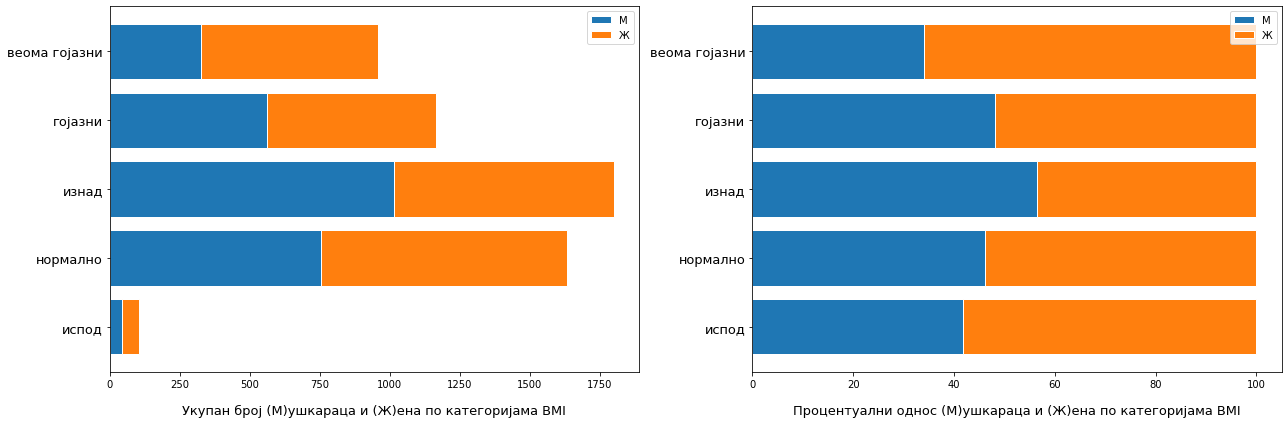

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

svi.plot.barh(edgecolor='white', width=0.8, stacked=True, ax=ax1)
# Параметром fontsize подешавамо величину фонта
ax1.set_yticklabels(kategorijeNazivi, rotation=0, fontsize=13)
# Параметром labelpad мало одмичемо назив осе од саме осе
ax1.set_xlabel('Укупан број (М)ушкараца и (Ж)ена по категоријама BMI', fontsize=13, labelpad=15)

sviProc.plot.barh(edgecolor='white', width=0.8, stacked=True, ax=ax2)
ax2.set_yticklabels(kategorijeNazivi, rotation=0, fontsize=13)
ax2.set_xlabel('Процентуални однос (М)ушкараца и (Ж)ена по категоријама BMI', fontsize=13, labelpad=15)

fig.tight_layout()

Обратите пажњу да на левом графикону максимална вредност на x-оси приближно одговара учесталости најфреквентније групе (особе са прекомерном тежином), док је на десном то вредност 100 (процената). Оба типа графикона имају своје предности и мане. Помоћу левог се лакше пореде учесталости по категоријама BMI, док се на десном лакше уочава удео мушкараца и жена у свакој групи. Генерално бисмо могли да закључимо да је међу испитаницима највише оних који имају прекомерну тежину или су гојазни, као и да је посебно велика пропорција жена у групама веома гојазних особа и особа са недовољном тежином. 

**Да ли сте гојазни?**

Научили сте нешто о референтним вредностима за разврставање људи у категорије с обзиром на индекс телесне масе, тако да самостално можете да одговорите на поставлјено питанје и да процените којој од тих категорија припадате.